In [1]:
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
import glob
import os
import pandas as pd
import traceback
import numpy as np
from tqdm import tqdm
import pandas as pd

In [2]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from Metadata import MetaCreate
from Audio_preprocess import AudioUtil


In [3]:
meta=MetaCreate()
meta_data=meta.generate_meta_data()

In [7]:
meta_data.head()

,file,text,path,sample_rate,channels,duration
0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,../data/train/wav/SWH-05-20101106/SWH-05-20101...,16000,1,3.10
1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,../data/train/wav/SWH-05-20101106/SWH-05-20101...,16000,1,3.65
2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,../data/train/wav/SWH-05-20101106/SWH-05-20101...,16000,1,3.90
3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,../data/train/wav/SWH-05-20101106/SWH-05-20101...,16000,1,2.94
4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,kule abidjan raia wa jiji hilo,../data/train/wav/SWH-05-20101106/SWH-05-20101...,16000,1,2.45


In [6]:
audioutil = AudioUtil()

5it [00:00,  9.91it/s]


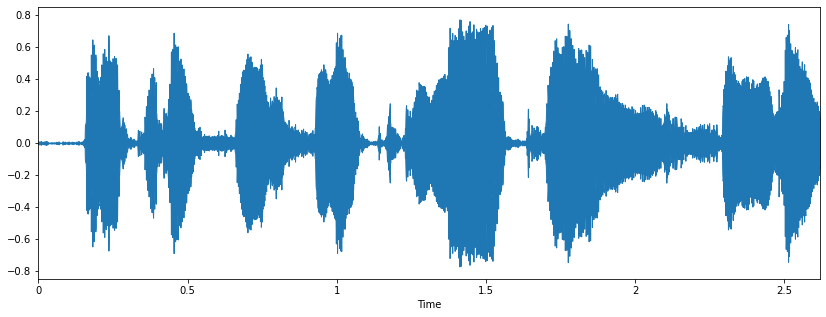

In [5]:
# loading one audio file
for index_num,row in tqdm(meta_data.iterrows()):
    file_name = os.path.join(str(row["path"]))
    if index_num == 5:
        # plotting the wave plot
        plt.figure(figsize=(14,5))
        data,sample_rate=librosa.load(file_name)
        librosa.display.waveplot(data,sr=sample_rate)
        ipd.Audio(file_name)
        break 

Extracting features and displaying it

(20, 113)


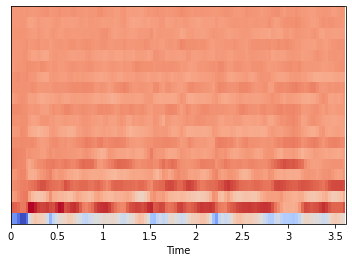

In [10]:
mfccs = librosa.feature.mfcc(data, sr=16000)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=16000, x_axis='time')

Loading all audio files

In [7]:
### Now we iterate through every metadata to load the data
audioTranscript_files=[]
for index_num,row in tqdm(meta_data.iterrows()):
    file_name = os.path.join(str(row["path"]))
    final_class_labels=row["text"]
    duration = row['duration']
    # data=audioutil.open(file_name)
    audioTranscript_files.append([final_class_labels,duration,file_name])

10179it [00:00, 15927.97it/s]


In [8]:
# saving list
audioTranscript_files=pd.DataFrame(audioTranscript_files,columns=['text','duration','key'])
audioTranscript_files.head()

,text,duration,key
0,yanayo andaliwa nami pendo pondo idhaa ya kisw...,3.10,../data/train/wav/SWH-05-20101106/SWH-05-20101...
1,inayokutangazia moja kwa moja kutoka jijini da...,3.65,../data/train/wav/SWH-05-20101106/SWH-05-20101...
2,juma hili bara la afrika limeshuhudia raia wa ...,3.90,../data/train/wav/SWH-05-20101106/SWH-05-20101...
3,wakipiga kura ya maoni ilikufanya mabadiliko ya,2.94,../data/train/wav/SWH-05-20101106/SWH-05-20101...
4,kule abidjan raia wa jiji hilo,2.45,../data/train/wav/SWH-05-20101106/SWH-05-20101...


In [13]:
for index_num,row in tqdm(audioTranscript_files.iterrows()):
    print(row)
    break

0it [00:00, ?it/s]

text        yanayo andaliwa nami pendo pondo idhaa ya kisw...
duration                                                  3.1
key         ../data/train/wav/SWH-05-20101106/SWH-05-20101...
Name: 0, dtype: object


In [9]:
# converts to json file
import json
dir_name = './train_corpus.json'
with open(dir_name, mode='w', encoding='utf-8') as feedsjson:
    for index_num,row in tqdm(audioTranscript_files.iterrows()):
        # print(row)
        if index_num == 8144:
            break
        entry = {'text': row.text, 'duration': row.duration, 'key': row.key}
        # feeds.append(entry)
        json.dump(entry, feedsjson)

8144it [00:00, 12212.63it/s]


In [10]:
#Valiadtion data
# converts to json file
import json
dir_name = './validation_corpus.json'
with open(dir_name, mode='w', encoding='utf-8') as feedsjson:
    for index_num,row in tqdm(audioTranscript_files.iterrows()):
        # print(row)
        if index_num >= 8144:
            entry = {'text': row.text, 'duration': row.duration, 'key': row.key}
            # feeds.append(entry)
            json.dump(entry, feedsjson)

10179it [00:00, 22124.46it/s]


In [19]:
audioTranscript_files.to_json('../data_St/train_corpus.json')

# Changing mono sound to stereo

In [9]:
# since we want to change our file to stereo, we will assign the channel to be  2
channel= 2
### Now we iterate the first 100 audio file and change the channel 
changes_channel=[]
for index_num,row in tqdm(audioTranscript_files.iterrows()):
    file_name = row["audio"]
    final_class_labels=row["text"]
    data=audioutil.rechannel(file_name,channel)
    changes_channel.append([data,final_class_labels])

10179it [00:02, 4953.12it/s]


In [10]:
# saving list
changes_channel=pd.DataFrame(changes_channel,columns=['audio','text'])
changes_channel.head()

,audio,text
0,"([[tensor(0.0048), tensor(0.0061), tensor(0.00...",yanayo andaliwa nami pendo pondo idhaa ya kisw...
1,"([[tensor(0.0091), tensor(0.0082), tensor(0.00...",inayokutangazia moja kwa moja kutoka jijini da...
2,"([[tensor(-0.0113), tensor(-0.0111), tensor(-0...",juma hili bara la afrika limeshuhudia raia wa ...
3,"([[tensor(0.0109), tensor(0.0133), tensor(0.01...",wakipiga kura ya maoni ilikufanya mabadiliko ya
4,"([[tensor(0.0023), tensor(0.0009), tensor(0.00...",kule abidjan raia wa jiji hilo


# Re sampling Audio data set

In [11]:
# Since Resample applies to a single channel, we resample one channel at a time
# new sample Rate for all the audio file will be the most common one which is 16000
newsr = 16000
resampling_audio=[]
### Now we iterate through every audio file and resamples the audio
for index_num,row in tqdm(changes_channel.iterrows()):
    file_name = row["audio"]
    final_class_labels=row["text"]
    data=audioutil.resample(file_name,newsr)
    resampling_audio.append([data,final_class_labels])

10179it [00:00, 20300.81it/s]


In [17]:
# saving list
resampling_audio=pd.DataFrame(resampling_audio,columns=['audio','text'])
resampling_audio.head()

,audio,text
0,"([[tensor(0.0048), tensor(0.0061), tensor(0.00...",yanayo andaliwa nami pendo pondo idhaa ya kisw...
1,"([[tensor(0.0091), tensor(0.0082), tensor(0.00...",inayokutangazia moja kwa moja kutoka jijini da...
2,"([[tensor(-0.0113), tensor(-0.0111), tensor(-0...",juma hili bara la afrika limeshuhudia raia wa ...
3,"([[tensor(0.0109), tensor(0.0133), tensor(0.01...",wakipiga kura ya maoni ilikufanya mabadiliko ya
4,"([[tensor(0.0023), tensor(0.0009), tensor(0.00...",kule abidjan raia wa jiji hilo


# Resizing to the same length

In [13]:
# The maximum audio length we have in the data set is 6.15 sec, so we will try to resize 
# all the data to the maximum length.
max_ms = 6150
resizing_Length=[]
### Now we iterate through every audio file and resizes to the same length
for index_num,row in tqdm(resampling_audio.iterrows()):
    file_name = row["audio"]
    final_class_labels=row["text"]
    data=audioutil.pad_trunc(file_name,max_ms)
    resizing_Length.append([data,final_class_labels])

10179it [00:03, 3026.54it/s]


In [19]:
# saving list
resizing_Length=pd.DataFrame(resizing_Length,columns=['audio','text'])
resizing_Length.head()

,audio,text
0,"([[tensor(0.), tensor(0.), tensor(0.), tensor(...",yanayo andaliwa nami pendo pondo idhaa ya kisw...
1,"([[tensor(0.), tensor(0.), tensor(0.), tensor(...",inayokutangazia moja kwa moja kutoka jijini da...
2,"([[tensor(0.), tensor(0.), tensor(0.), tensor(...",juma hili bara la afrika limeshuhudia raia wa ...
3,"([[tensor(0.), tensor(0.), tensor(0.), tensor(...",wakipiga kura ya maoni ilikufanya mabadiliko ya
4,"([[tensor(0.), tensor(0.), tensor(0.), tensor(...",kule abidjan raia wa jiji hilo


# Data Augmentation

In [20]:
# The time shift we will use for this data set sr/10
sr =16000
shift_limit = sr/10
Data_Augments=[]
### Now we iterate through every audio file and resizes to the same length
for index_num,row in tqdm(resizing_Length.iterrows()):
    file_name = row["audio"]
    final_class_labels=row["text"]
    data=audioutil.time_shift(file_name,shift_limit)
    Data_Augments.append([data,final_class_labels])

10179it [00:01, 7434.96it/s]


In [21]:
# saving list
Data_Augments=pd.DataFrame(Data_Augments,columns=['audio','text'])
Data_Augments.shape

(10179, 2)

In [22]:
# saving list
Data_Augments=pd.DataFrame(Data_Augments,columns=['audio','text'])
Data_Augments.head()

,audio,text
0,"([[tensor(0.), tensor(0.), tensor(0.), tensor(...",yanayo andaliwa nami pendo pondo idhaa ya kisw...
1,"([[tensor(0.1709), tensor(0.2057), tensor(0.22...",inayokutangazia moja kwa moja kutoka jijini da...
2,"([[tensor(0.), tensor(0.), tensor(0.), tensor(...",juma hili bara la afrika limeshuhudia raia wa ...
3,"([[tensor(0.), tensor(0.), tensor(0.), tensor(...",wakipiga kura ya maoni ilikufanya mabadiliko ya
4,"([[tensor(-0.1109), tensor(-0.0138), tensor(0....",kule abidjan raia wa jiji hilo


# Feature extraction using Mel Spectrogram

In [23]:
### Now we iterate through every audio file and extracts feature
Feature_Extraction = []
for index_num,row in tqdm(Data_Augments.iterrows()):
    file_name = row["audio"]
    final_class_labels=row["text"]
    data=audioutil.spectro_gram(file_name, n_mels=64, n_fft=1024, hop_len=None)
    Feature_Extraction.append([data,final_class_labels])


9281it [00:39,  6.77it/s]

In [42]:
Feature_Extraction=pd.DataFrame(Feature_Extraction,columns=['audio','text'])
Feature_Extraction.head()

,audio,text
0,"[[[tensor(-42.5674), tensor(-42.5674), tensor(...",yanayo andaliwa nami pendo pondo idhaa ya kisw...
1,"[[[tensor(5.8928), tensor(0.1204), tensor(3.41...",inayokutangazia moja kwa moja kutoka jijini da...
2,"[[[tensor(-39.2071), tensor(-39.2071), tensor(...",juma hili bara la afrika limeshuhudia raia wa ...
3,"[[[tensor(15.0539), tensor(1.7983), tensor(-3....",wakipiga kura ya maoni ilikufanya mabadiliko ya
4,"[[[tensor(19.1341), tensor(-1.4305), tensor(7....",kule abidjan raia wa jiji hilo
